In [1]:
# Spring 2022
# loading images

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# load the raw data
#X_train = np.load('X_train.npy')
#y_train = np.load('y_train.npy')
X_train = np.load('/kaggle/input/stats302-2023/X_train.npy')
y_train = np.load('/kaggle/input/stats302-2023/y_train.npy')
print('shape of the training data:', X_train.shape)
print('shape of the target data:', y_train.shape)

shape of the training data: (3320, 150, 150)
shape of the target data: (3320,)


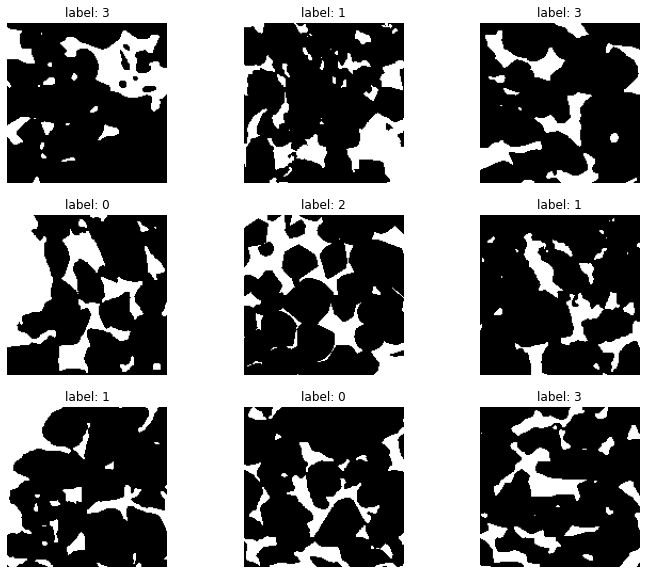

In [4]:
# preview some of the training images
plt.figure(figsize=(12,10))
x, y =3, 3
for i in range(9):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i,:,:],cmap='gray')
    plt.title('label: {}'.format(y_train[i]))
    plt.axis('off')
plt.show()

In [5]:
# analyze data
# see if the dataset is balanced
valid = 0
for i in range(4):
    n = np.count_nonzero(y_train == i)
    print("Occurrence of category {}: {}".format(i, n))
    valid += n
invalid = y_train.shape[0] - valid
# see if it contains invalid labels
print("Invalid: {}".format(invalid))

Occurrence of category 0: 821
Occurrence of category 1: 814
Occurrence of category 2: 864
Occurrence of category 3: 821
Invalid: 0


In [6]:
# train you model
# create validation data
from sklearn.model_selection import train_test_split


# reshape X_train
X_train = X_train.reshape(X_train.shape[0], 150, 150, 1)

# save the initial datasets
X_ori = X_train
y_ori = y_train


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)
print("X_train.shape:",X_train.shape)
print("X_train.shape:",y_train.shape)

X_train.shape: (2324, 150, 150, 1)
X_train.shape: (2324,)


In [7]:
# train you model
# pre-processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# here we augment
data_gen = ImageDataGenerator(horizontal_flip=True,
                              vertical_flip = True)

train_generator = data_gen.flow(X_train, y_train,batch_size= 20)
validation_generator = data_gen.flow(X_val, y_val, batch_size=20)

In [8]:
# train you model
# building model similar to cats versus dogs
# the input shape is different
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150, 150, 1))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

# output changed to softmax
output = layers.Dense(4, activation='softmax')(x)

# Create model:
model = Model(img_input, output)

model.summary()

2023-02-12 17:34:28.276570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:34:28.358868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:34:28.359728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

2023-02-12 17:34:28.361426: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 17:34:28.361754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:34:28.362465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:34:28.363102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [9]:
# compiling model similar to cats versus dogs
from tensorflow.keras.optimizers import RMSprop

# using categorical_crossentropy instead pf
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [10]:
model.save_weights('initial_weights.h5')
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=7,
      validation_data=validation_generator,
      verbose=1)

2023-02-12 17:34:31.043854: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7


2023-02-12 17:34:32.481190: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 9s 14ms/step - loss: 1.5109 - acc: 0.2651 - val_loss: 1.3758 - val_acc: 0.2932
Epoch 2/7
100/100 [==============================] - 1s 14ms/step - loss: 1.3477 - acc: 0.3463 - val_loss: 1.2223 - val_acc: 0.4669
Epoch 3/7
100/100 [==============================] - 1s 10ms/step - loss: 1.0873 - acc: 0.5161 - val_loss: 0.9373 - val_acc: 0.5894
Epoch 4/7
100/100 [==============================] - 1s 10ms/step - loss: 0.9079 - acc: 0.6084 - val_loss: 0.7717 - val_acc: 0.6727
Epoch 5/7
100/100 [==============================] - 1s 10ms/step - loss: 0.7464 - acc: 0.6880 - val_loss: 0.7754 - val_acc: 0.6807
Epoch 6/7
100/100 [==============================] - 1s 10ms/step - loss: 0.6694 - acc: 0.7193 - val_loss: 0.7666 - val_acc: 0.6657
Epoch 7/7
100/100 [==============================] - 1s 10ms/step - loss: 0.6203 - acc: 0.7495 - val_loss: 0.6417 - val_acc: 0.7239


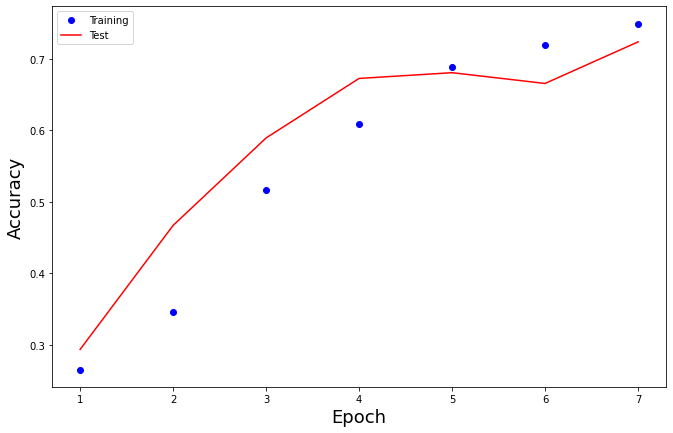

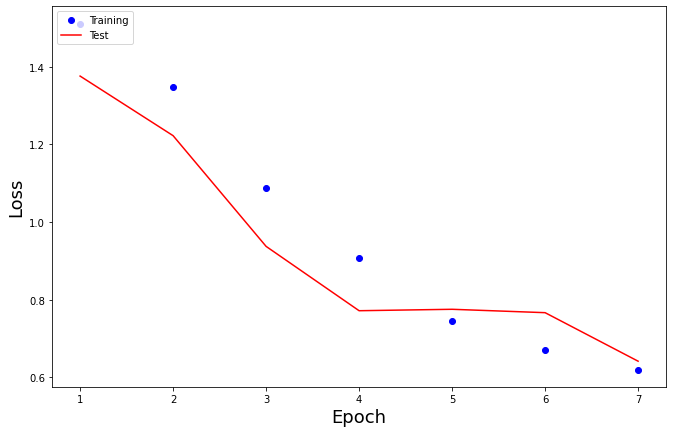

In [11]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(accuracy)+1)


plt.figure(figsize=(11,7))
plt.plot(epochs, accuracy, 'bo', label='Training')
plt.plot(epochs, val_accuracy, 'r', label='Test')
plt.xlabel('Epoch', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize=(11,7))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r', label='Test')
plt.xlabel('Epoch', size=18)
plt.ylabel('Loss', size=18)
plt.legend(loc = 'upper left')
plt.show()

In [12]:
#CAM
# get weights connecting the last layer
final_weights = model.layers[-1].get_weights()[0]
print('shape of final_weights:', final_weights.shape)

# get weights connecting the gap
gap_weights = model.layers[-2].get_weights()[0]
print('shape of gap_weights:', gap_weights.shape)

shape of final_weights: (512, 4)
shape of gap_weights: (18496, 512)


In [13]:
#CAM
# create a view on our model that gives us access to the output of
# the convolution layer and the results
cam_view  = Model(inputs=model.input,outputs=(model.layers[-4].output,model.layers[-1].output))
cam_view.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0   

In [14]:
# make a prediction for the first images of the validation dataset
features,result= cam_view.predict(X_val[0:1,:,:,:])
print(features.shape)
# remove first axis
feature_maps = features[0,:,:,:]
print(feature_maps.shape)

prediction =  np.argmax(result)
actual = y_val[0]

print('predicted value:', prediction)
print('labeled value:', actual)

(1, 17, 17, 64)
(17, 17, 64)
predicted value: 1
labeled value: 1


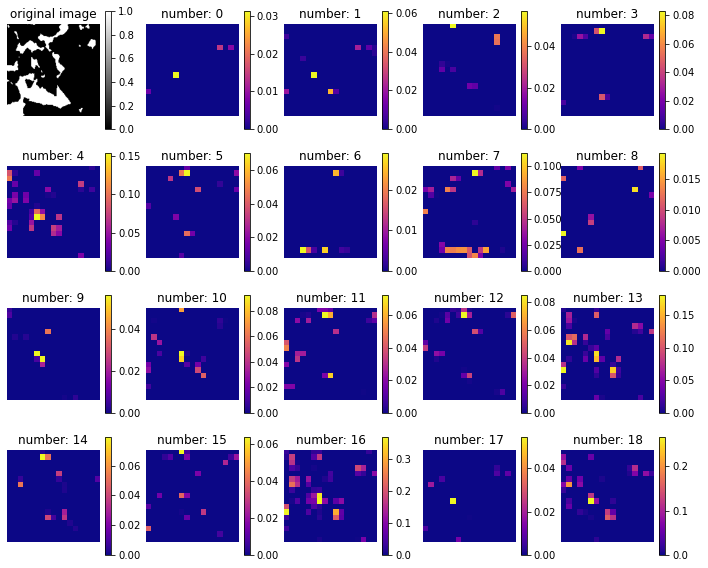

In [15]:
# preview 19 of the last convolution images for the first validation image
plt.figure(figsize=(12,10))
x, y =5, 4

plt.subplot(y, x, 1)
plt.title('original image')
plt.imshow(X_val[0].reshape((150,150)), cmap='gray')
plt.colorbar()
plt.axis('off')

for idx in range(19):
    plt.subplot(y, x, idx+2)
    plt.imshow(feature_maps[:,:,idx],cmap='plasma')
    plt.title('number: {}'.format(idx))
    plt.colorbar()
    plt.axis('off')
plt.show()

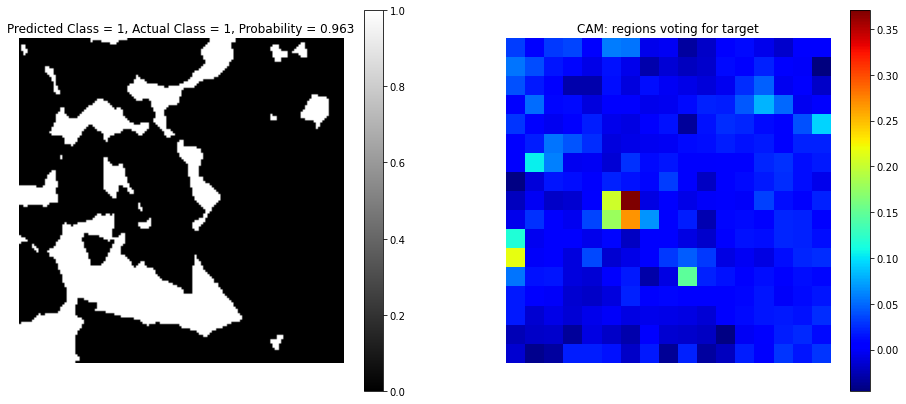

In [16]:
# compute the class activation matrix for
weights_prediction = final_weights[:,prediction]
weights_cam = np.dot(np.transpose(weights_prediction),np.transpose(gap_weights))


cam_output = np.reshape(feature_maps,(1,-1)) * weights_cam
cam_output = np.reshape(cam_output,feature_maps.shape)
cam_output = np.sum(cam_output,axis=-1)

plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
plt.title('Predicted Class = {}, Actual Class = {}, Probability = {:.3f}'.format(prediction,actual,result[0][prediction]))
plt.imshow(X_val[0].reshape((150,150)), cmap='gray')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CAM: regions voting for target')
plt.imshow(cam_output, cmap='jet')
plt.colorbar()
plt.axis('off')

plt.show()

In [17]:
# create RGB versions of the data
X_RGB = np.concatenate((X_ori,X_ori,X_ori),axis=3)
print(X_RGB.shape)

(3320, 150, 150, 3)


In [18]:
# Train validation split, again
X_train, X_val, y_train, y_val = train_test_split(X_RGB, y_ori, test_size=0.3)
print("X_train.shape:",X_train.shape)
print("X_train.shape:",y_train.shape)

X_train.shape: (2324, 150, 150, 3)
X_train.shape: (2324,)


In [19]:
# to generator
train_generator = data_gen.flow(X_train, y_train,batch_size= 20)
validation_generator = data_gen.flow(X_val, y_val, batch_size=20)

In [20]:
from tensorflow import keras
n_classes =4

# load the model
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                    include_top=False)   # but not the dense layer at the output
#create our own output model
avg = layers.GlobalAveragePooling2D()(base_model.output)
output = layers.Dense(n_classes, activation="softmax")(avg)

# combine the two parts
model1 = Model(inputs=base_model.input, outputs=output)

model1.summary()

83697664/83683744 [==============================] - 3s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________

In [21]:
# we will not train the base model
for layer in base_model.layers:
    layer.trainable = False


# we train our dense output layer
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)

model1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

history = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=7,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/7


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


100/100 [==============================] - 8s 54ms/step - loss: 22.8567 - accuracy: 0.5343 - val_loss: 12.9112 - val_accuracy: 0.6064
Epoch 2/7
100/100 [==============================] - 4s 43ms/step - loss: 6.6378 - accuracy: 0.6980 - val_loss: 7.8203 - val_accuracy: 0.6737
Epoch 3/7
100/100 [==============================] - 4s 43ms/step - loss: 5.2372 - accuracy: 0.7006 - val_loss: 6.8387 - val_accuracy: 0.6596
Epoch 4/7
100/100 [==============================] - 5s 45ms/step - loss: 4.5688 - accuracy: 0.7117 - val_loss: 5.6292 - val_accuracy: 0.6496
Epoch 5/7
100/100 [==============================] - 4s 42ms/step - loss: 3.0089 - accuracy: 0.7460 - val_loss: 2.5109 - val_accuracy: 0.7369
Epoch 6/7
100/100 [==============================] - 4s 43ms/step - loss: 2.3437 - accuracy: 0.7520 - val_loss: 2.5436 - val_accuracy: 0.7249
Epoch 7/7
100/100 [==============================] - 4s 42ms/step - loss: 2.4097 - accuracy: 0.7475 - val_loss: 3.4983 - val_accuracy: 0.6837


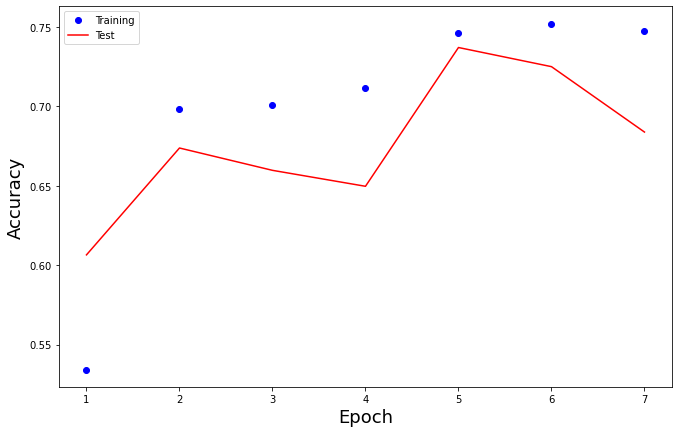

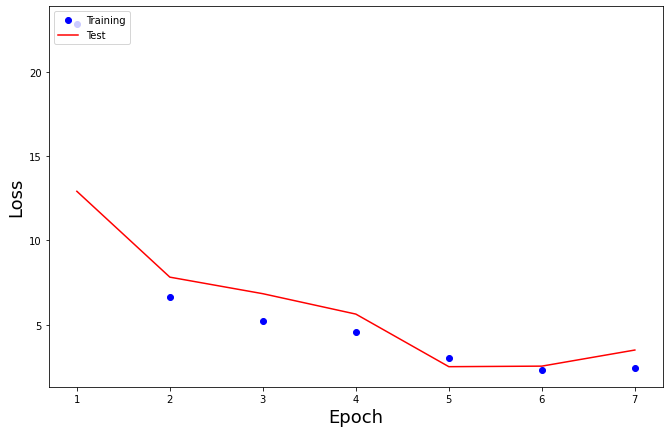

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(11, 7))
plt.plot(epochs, accuracy, 'bo', label='Training')
plt.plot(epochs, val_accuracy, 'r', label='Test')
plt.xlabel('Epoch', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(11, 7))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r', label='Test')
plt.xlabel('Epoch', size=18)
plt.ylabel('Loss', size=18)
plt.legend(loc='upper left')
plt.show()

In [23]:
# Random forest with feature extraction
# Train validation split, again
# reusing X_RGB to adapt to imagenet
X_train, X_val, y_train, y_val = train_test_split(X_RGB, y_ori, test_size=0.3)
print("X_train.shape:",X_train.shape)
print("X_train.shape:",y_train.shape)

X_train.shape: (2324, 150, 150, 3)
X_train.shape: (2324,)


In [24]:
# Augmentation
train_generator = data_gen.flow(X_train, y_train,batch_size=20)
validation_generator = data_gen.flow(X_val, y_val, batch_size=20)

In [25]:
# load model
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# function for extracting feature
def extract_features(generator, my_model, batch_size=20):
    x_features = np.zeros(shape=(1, 4 * 4 * 512))
    labels = np.zeros(shape=(1,))
    batch_num = 0
    for inputs, target in generator:
        features_batch = my_model.predict(inputs)
        x_features = np.concatenate((x_features,np.reshape(features_batch,(batch_size, -1))),axis=0)
        labels = np.concatenate((labels,target),axis=0)
        batch_num += 1
        if (x_features.shape[0] + batch_size) > generator.n:
            break
    x_features = np.delete(x_features,0,0)
    labels = np.delete(labels,0,0)
    return x_features, labels

# create features and labels
train_features, train_labels = extract_features(train_generator, base_model)
print(train_features.shape)
val_features, val_labels = extract_features(validation_generator, base_model)

58900480/58889256 [==============================] - 2s 0us/step
(2320, 8192)


In [26]:
# train model
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, min_samples_leaf=100)
model2.fit(train_features, train_labels)

RandomForestClassifier(min_samples_leaf=100)

In [27]:
# accuracy score
train_acc = model2.score(train_features,train_labels)
val_acc = model2.score(val_features,val_labels)
print("Training Accuracy: {:.4}".format(train_acc))
print("Testing Accuracy: {:.4}".format(val_acc))

Training Accuracy: 0.7664
Testing Accuracy: 0.6898


In [28]:
# load the test data
#X_test = np.load('X_test.npy')
X_test = np.load('/kaggle/input/stats302-2023/X_test.npy')
print('shape of the test data:', X_test.shape)

shape of the test data: (830, 150, 150)


In [29]:
# reshape and put into ImageDav

X_test = X_test.reshape(X_test.shape[0], 150, 150, 1)
X_test_RGB = np.concatenate((X_test,X_test,X_test),axis=3)
test_datagen = ImageDataGenerator()

image_generator = test_datagen.flow(X_test,
        batch_size=830,
        shuffle=False)               # important to keep the filenames and results aligned

image_generator_RGB = test_datagen.flow(X_test_RGB,
        batch_size=830,
        shuffle=False)               # important to keep the filenames and results aligned

# predict
y_pred0 = model.predict(image_generator)
print(y_pred0.shape)
y_pred1 = model1.predict(image_generator_RGB)
print(y_pred1.shape)
X_test_feature = base_model.predict(image_generator_RGB)
X_test_feature = np.reshape(X_test_feature,(830,-1))
print(X_test_feature.shape)
y_pred2 = model2.predict(X_test_feature)
print(y_pred2.shape)

(830, 4)
(830, 4)


2023-02-12 17:36:05.475311: W tensorflow/core/kernels/gpu_utils.cc:49] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


(830, 8192)
(830,)


In [30]:
# make prediction for the test data
# esemble
import pandas as pd
from scipy import stats

y_pred = np.zeros(shape=(830,2))
for i in range(830):
    votes = (np.argmax(y_pred0[i]),np.argmax(y_pred1[i]),y_pred2[i])
    y_pred[i][0] = i
    y_pred[i][1] = stats.mode(votes).mode[0]
res = pd.DataFrame(data=y_pred,columns=['Id','Category'])
res = res.astype(int)
res.head()

,Id,Category
0,0,2
1,1,2
2,2,1
3,3,0
4,4,1


In [31]:
# write to csv
res.to_csv('my_prediction.csv', index=False)